# Indian Patent Dataset Analysis
This notebook provides an exploratory data analysis (EDA) of the Indian Patent Dataset for the years 2010, 2011, and 2019.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

df_2010 = pd.read_csv('data/2010.csv')
df_2011 = pd.read_csv('data/2011.csv')
df_2019 = pd.read_csv('data/2019.csv')

df_2010.head(), df_2011.head(), df_2019.head()

(  Application Number                                              Title  \
 0         2/CHE/2010  NOVEL SOLID STATE FORMS OF RACEMIC ROTIGOTINE ...   
 1    2430/MUMNP/2009  THE APPLICATION OF 5-METHYL-1,3-BENZENEDIOL OR...   
 2       1/DELNP/2010                 "METHOD FOR PRODUCING FENOFIBRATE"   
 3       2/DELNP/2010  MONITORING OF BLADE FREQUENCIES OF A WIND TURBINE   
 4       2/MUMNP/2010  TRANSMISSION UNIT, PARTICULARLY MULTI-RANGE TR...   
 
   Application Date     Status Publication Number Publication Date(U/S 11A)  \
 0       01/01/2010  Published            21/2012                25/05/2012   
 1       01/01/2010  Published            08/2014                21/02/2014   
 2       01/01/2010  Published            30/2010                23/07/2010   
 3       01/01/2010  Published            30/2010                23/07/2010   
 4       01/01/2010  Published            32/2010                06/08/2010   
 
   Publication Type Application Filing Date        Priority Number

## Basic Information
Get an overview of the datasets to understand their structure and basic statistics.

In [37]:
# Basic information about the datasets
print('2010 Dataset Information:')
print(df_2010.info())
print('2011 Dataset Information:')
print(df_2011.info())
print('2019 Dataset Information:')
print(df_2019.info())

2010 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35834 entries, 0 to 35833
Data columns (total 35 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Application Number                    35834 non-null  object
 1   Title                                 35834 non-null  object
 2   Application Date                      35834 non-null  object
 3   Status                                35834 non-null  object
 4   Publication Number                    35832 non-null  object
 5   Publication Date(U/S 11A)             35832 non-null  object
 6   Publication Type                      35834 non-null  object
 7   Application Filing Date               35834 non-null  object
 8   Priority Number                       27764 non-null  object
 9   Priority Country                      27764 non-null  object
 10  Priority Date                         27764 non-null  object
 11  Fi

## Data Cleaning
Handle missing values, duplicates, and other inconsistencies in the datasets.

In [38]:
# Checking for missing values
print('Missing values in 2010 dataset:')
print(df_2010.isnull().sum())
print('Missing values in 2011 dataset:')
print(df_2011.isnull().sum())
print('Missing values in 2019 dataset:')
print(df_2019.isnull().sum())

Missing values in 2010 dataset:
Application Number                          0
Title                                       0
Application Date                            0
Status                                      0
Publication Number                          2
Publication Date(U/S 11A)                   2
Publication Type                            0
Application Filing Date                     0
Priority Number                          8070
Priority Country                         8070
Priority Date                            8070
Field Of Invention                        446
Classification (IPC)                       17
Inventor Name                             140
Inventor Address                          142
Inventor Country                          135
Inventor Nationality                      135
Applicant Name                             89
Applicant Address                          89
Applicant Country                          89
Applicant Nationality                      89
Ap

In [39]:
# Dropping duplicates
df_2010.drop_duplicates(inplace=True)
df_2011.drop_duplicates(inplace=True)
df_2019.drop_duplicates(inplace=True)

## Data Analysis
Analyze the data to gain insights into the patent landscape in India.

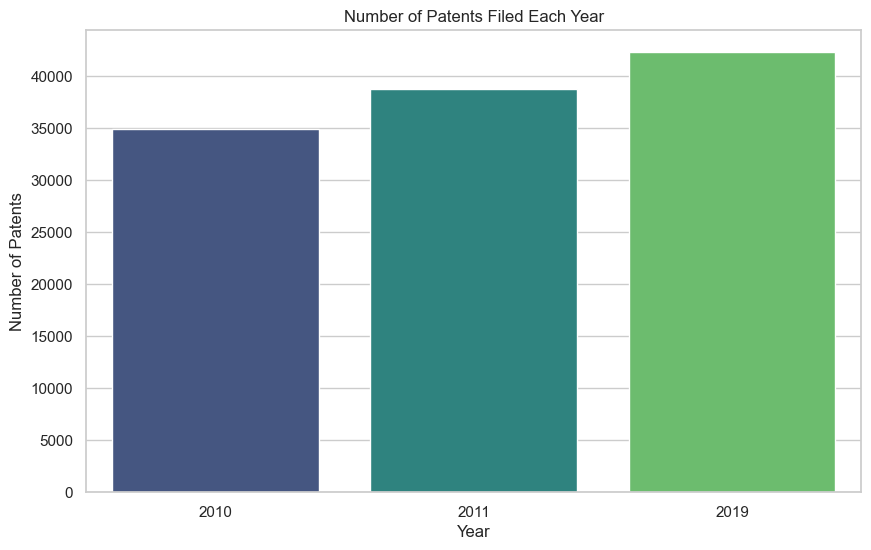

In [40]:
# Distribution of patents filed over the years
df_2010['Year'] = 2010
df_2011['Year'] = 2011
df_2019['Year'] = 2019
df_all = pd.concat([df_2010, df_2011, df_2019])

plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=df_all, palette='viridis')
plt.title('Number of Patents Filed Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Patents')
plt.show()

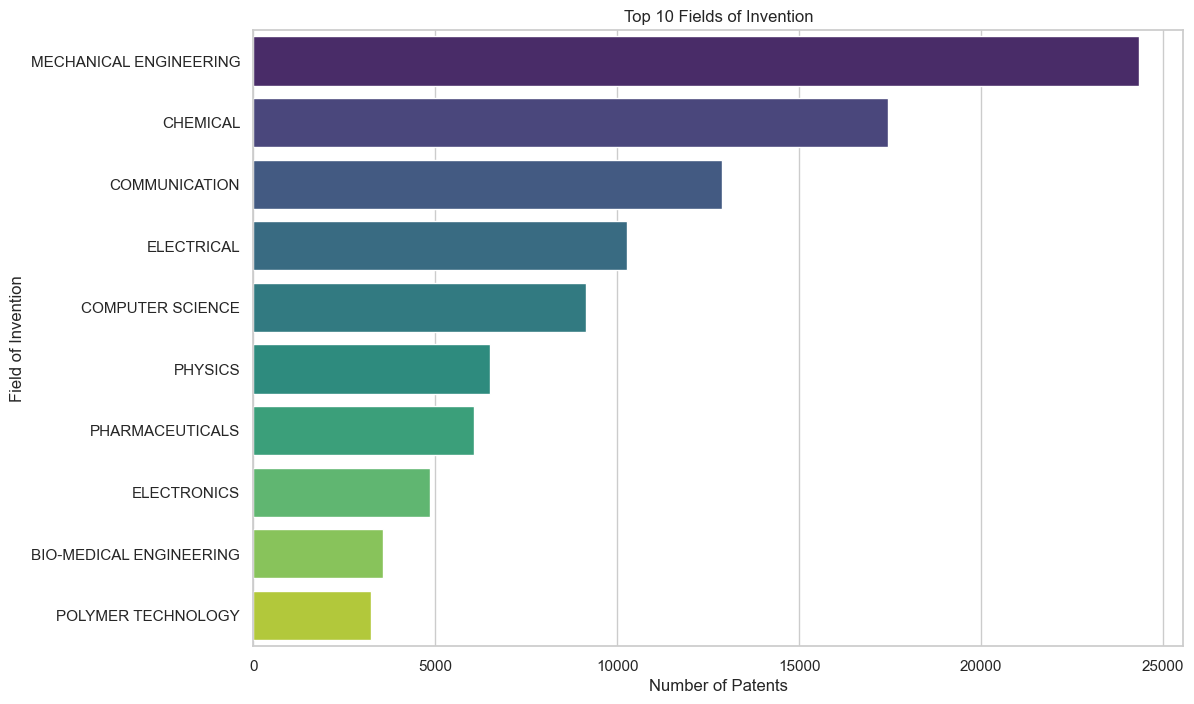

In [41]:
# Top fields of invention
top_fields = df_all['Field Of Invention'].value_counts().head(10)

plt.figure(figsize=(12, 8))
sns.barplot(y=top_fields.index, x=top_fields.values, palette='viridis')
plt.title('Top 10 Fields of Invention')
plt.xlabel('Number of Patents')
plt.ylabel('Field of Invention')
plt.show()

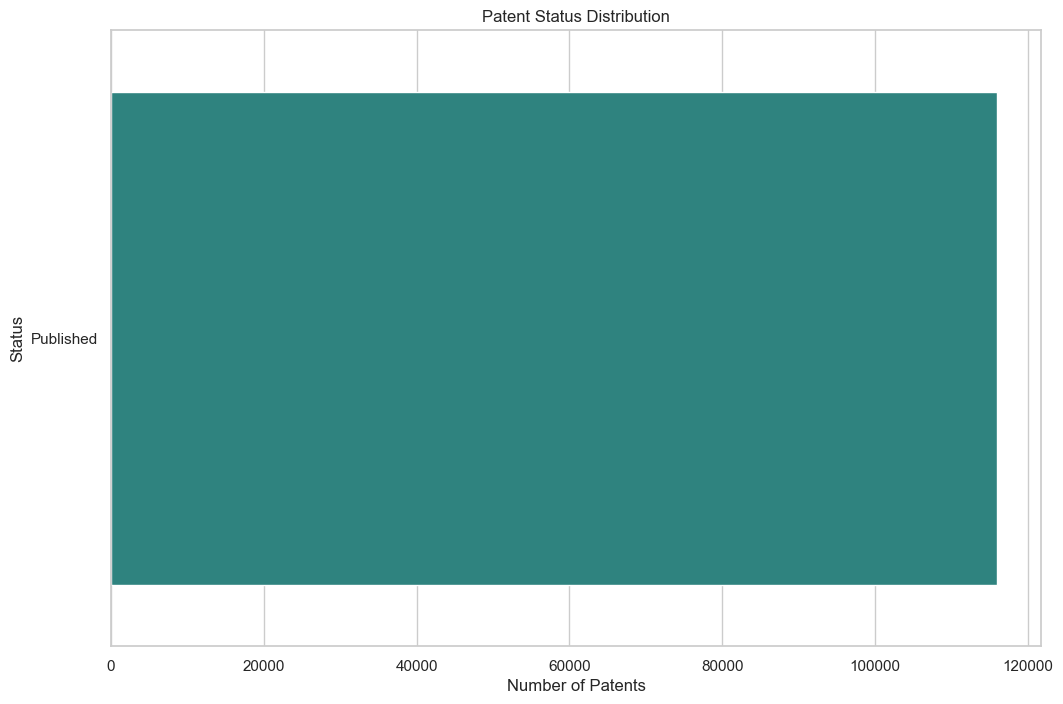

In [42]:
# Analysis of patent statuses
statuses = df_all['Status'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(y=statuses.index, x=statuses.values, palette='viridis')
plt.title('Patent Status Distribution')
plt.xlabel('Number of Patents')
plt.ylabel('Status')
plt.show()

In [43]:
print(df_all.columns)

Index(['Application Number', 'Title', 'Application Date', 'Status',
       'Publication Number', 'Publication Date(U/S 11A)', 'Publication Type',
       'Application Filing Date', 'Priority Number', 'Priority Country',
       'Priority Date', 'Field Of Invention', 'Classification (IPC)',
       'Inventor Name', 'Inventor Address', 'Inventor Country',
       'Inventor Nationality', 'Applicant Name', 'Applicant Address',
       'Applicant Country', 'Applicant Nationality', 'Application Type',
       'E-MAIL (As Per Record)', 'ADDITIONAL-EMAIL (As Per Record)',
       'E-MAIL (UPDATED Online)', 'PARENT APPLICATION NUMBER',
       'PARENT APPLICATION FILING DATE', 'REQUEST FOR EXAMINATION DATE',
       'FIRST EXAMINATION REPORT DATE', 'Date Of Certificate Issue',
       'POST GRANT JOURNAL DATE', 'REPLY TO FER DATE',
       'PCT INTERNATIONAL APPLICATION NUMBER', 'PCT INTERNATIONAL FILING DATE',
       'Application Status', 'Year'],
      dtype='object')


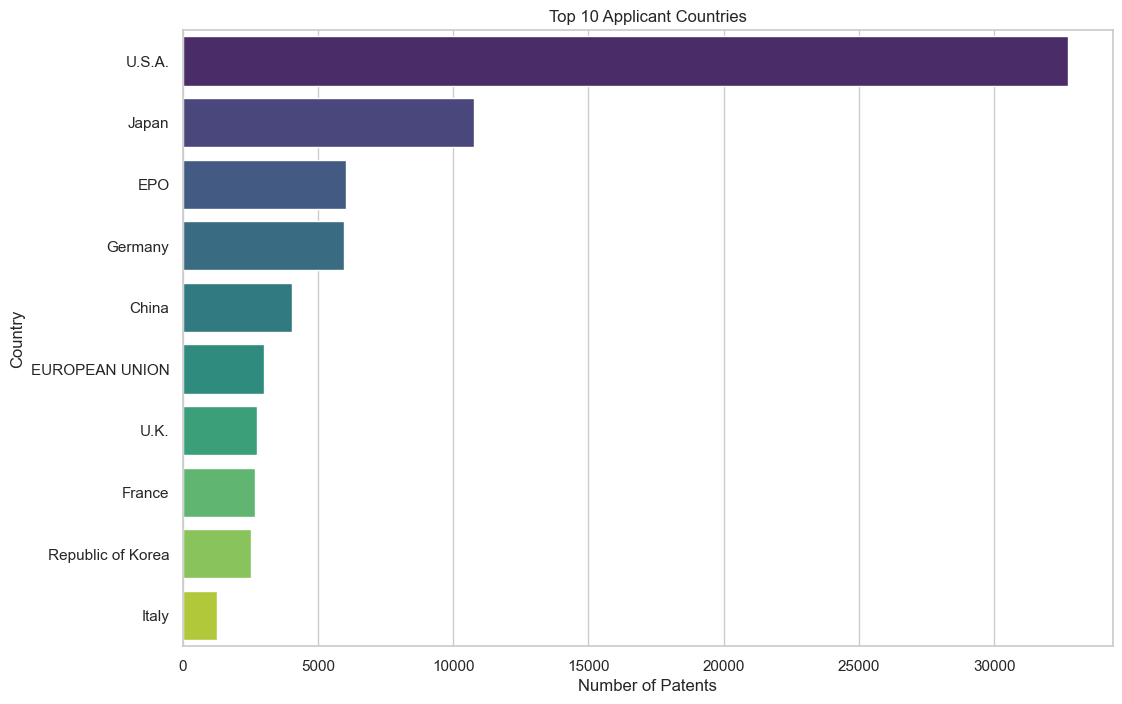

In [44]:
# Distribution of patents by applicant countries
applicant_countries = df_all['Priority Country'].value_counts().head(10)


plt.figure(figsize=(12, 8))
sns.barplot(y=applicant_countries.index, x=applicant_countries.values, palette='viridis')
plt.title('Top 10 Applicant Countries')
plt.xlabel('Number of Patents')
plt.ylabel('Country')
plt.show()



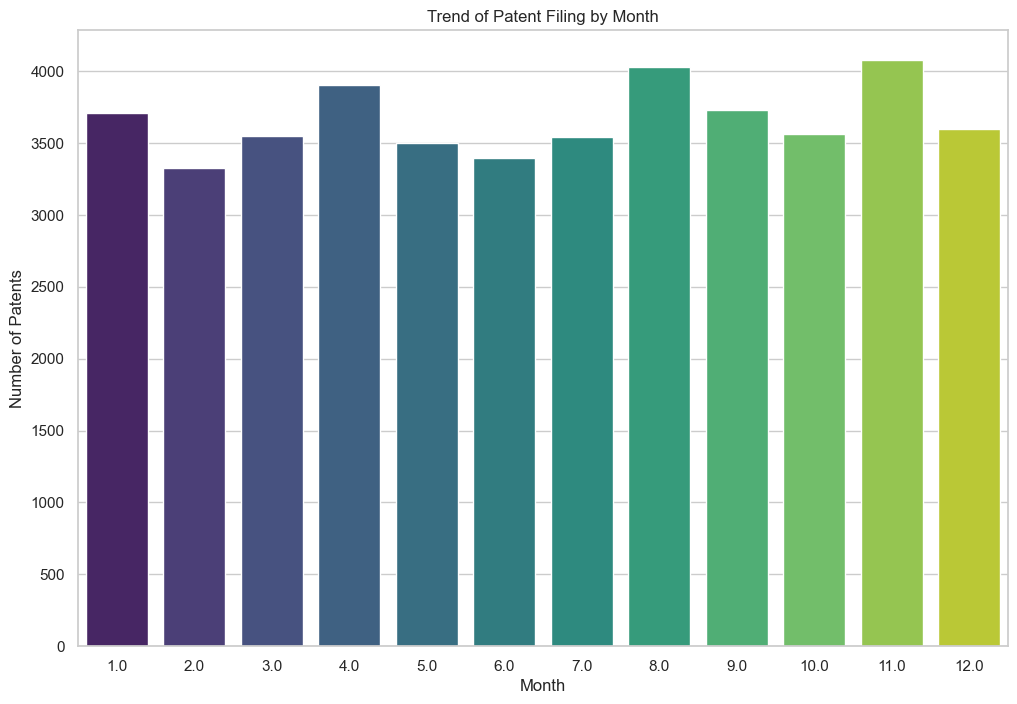

In [45]:
# Trends in patent filing dates
df_all['Application Date'] = pd.to_datetime(df_all['Application Date'], errors='coerce')
df_all['Filing Month'] = df_all['Application Date'].dt.month

plt.figure(figsize=(12, 8))
sns.countplot(x='Filing Month', data=df_all, palette='viridis')
plt.title('Trend of Patent Filing by Month')
plt.xlabel('Month')
plt.ylabel('Number of Patents')
plt.show()